動作のロジスティック回帰モデルを作成

参考：

https://datawokagaku.com/logstic_reg_python/

https://datawokagaku.com/confusion_matrix/

1937 flame from 63s

approximately 30 Hz

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import seaborn as sns
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

#CSVファイル読み込み。
df = pd.read_csv('/content/drive/MyDrive/data/_g_long_ex_2ddata_ang_labeled.csv', sep=",")

# human カラムを落とす
df.drop('human', axis=1, inplace=True)
display(df.head(5))

,Unnamed: 0,flame,ang_elbowL,ang_elbowR,pos_handL_x,pos_handL_y,pos_handR_x,pos_handR_y,label
0,0,0,160,161,698,400,440,398,0
1,0,1,160,162,698,400,438,398,0
2,0,2,159,164,698,400,436,396,0
3,0,3,159,161,696,398,440,400,0
4,0,4,161,162,698,402,438,396,0


ax.lines before plot:
 []
ax.lines after 1st plot:
ax.lines after 2nd plot:
 [<matplotlib.lines.Line2D object at 0x7f23e29dbb20>, <matplotlib.lines.Line2D object at 0x7f23e29dbee0>]
line1: Line2D(left hand x)
line2: Line2D(right hand x)
ax.lines before plot:
 []
ax.lines after 1st plot:
ax.lines after 2nd plot:
 [<matplotlib.lines.Line2D object at 0x7f23e29a7f70>, <matplotlib.lines.Line2D object at 0x7f23e29b12b0>]
line1: Line2D(left hand y)
line2: Line2D(right hand y)


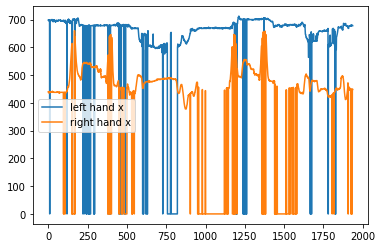

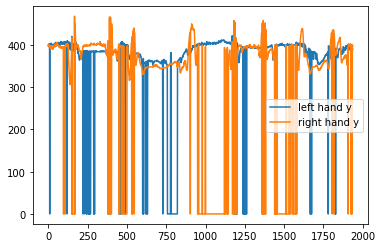

In [ ]:
# それぞれのパラメータのプロット
# 右手と左手の座標

fig = plt.figure() # Figureを作成
ax = fig.add_subplot(1,1,1) # Axesを作成
print('ax.lines before plot:\n', ax.lines) # Axes.linesは空リスト
line1, = ax.plot(df['flame'], df['pos_handL_x'], label='left hand x') # Axes.linesにLine2Dを追加+その他の設定
print('ax.lines after 1st plot:\n', ax.lines)
line2, = ax.plot(df['flame'], df['pos_handR_x'], label='right hand x') # Axes.linesにLine2Dを追加+その他の設定
print('ax.lines after 2nd plot:\n', ax.lines)
ax.legend()
print('line1:', line1)
print('line2:', line2)

# y point of left and right hands
fig_y = plt.figure() # Figureを作成
ax_y = fig_y.add_subplot(1,1,1) # Axesを作成
print('ax.lines before plot:\n', ax_y.lines) # Axes.linesは空リスト
line1_y, = ax_y.plot(df['flame'], df['pos_handL_y'], label='left hand y') # Axes.linesにLine2Dを追加+その他の設定
print('ax.lines after 1st plot:\n', ax_y.lines)
line2_y, = ax_y.plot(df['flame'], df['pos_handR_y'], label='right hand y') # Axes.linesにLine2Dを追加+その他の設定
print('ax.lines after 2nd plot:\n', ax_y.lines)
ax_y.legend()
print('line1:', line1_y)
print('line2:', line2_y)

ax.lines before plot:
 []
ax.lines after 1st plot:
ax.lines after 2nd plot:
 [<matplotlib.lines.Line2D object at 0x7f23e24add60>, <matplotlib.lines.Line2D object at 0x7f23e24b8250>]


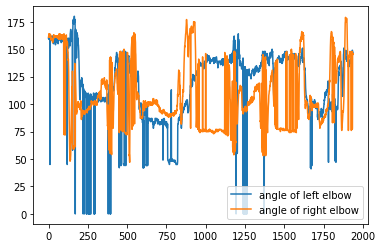

In [ ]:
# angle of parameter

fig = plt.figure() # Figureを作成
ax = fig.add_subplot(1,1,1) # Axesを作成
print('ax.lines before plot:\n', ax.lines) # Axes.linesは空リスト
line1, = ax.plot(df['flame'], df['ang_elbowL'], label='angle of left elbow') # Axes.linesにLine2Dを追加+その他の設定
print('ax.lines after 1st plot:\n', ax.lines)
line2, = ax.plot(df['flame'], df['ang_elbowR'], label='angle of right elbow') # Axes.linesにLine2Dを追加+その他の設定
print('ax.lines after 2nd plot:\n', ax.lines)
ax.legend()

移動平均（MA）の計算

In [ ]:
df2 = df.copy()

In [ ]:
# 0値を過去3点分の移動平均

def MAzero(df, column):
  for j in range(len(df)):
    if df[column][j] == 0:
      df[column][j] = df.loc[j-3:j-1, column].mean()
  return df[column]

df2['ang_elbowL'] = MAzero(df2, 'ang_elbowL')
df2['ang_elbowR'] = MAzero(df2, 'ang_elbowR')
df2['pos_handL_x'] = MAzero(df2, 'pos_handL_x')
df2['pos_handL_y'] = MAzero(df2, 'pos_handL_y')
df2['pos_handR_x'] = MAzero(df2, 'pos_handR_x')
df2['pos_handR_y'] = MAzero(df2, 'pos_handR_y')

'''
fig = plt.figure() # Figureを作成
ax = fig.add_subplot(1,1,1) # Axesを作成
print('ax.lines before plot:\n', ax.lines) # Axes.linesは空リスト
line1, = ax.plot(df2['flame'], df2['ang_elbowL'], label='angle of left elbow') # Axes.linesにLine2Dを追加+その他の設定
ax.legend()
'''

"\nfig = plt.figure() # Figureを作成\nax = fig.add_subplot(1,1,1) # Axesを作成\nprint('ax.lines before plot:\n', ax.lines) # Axes.linesは空リスト\nline1, = ax.plot(df2['flame'], df2['ang_elbowL'], label='angle of left elbow') # Axes.linesにLine2Dを追加+その他の設定\nax.legend()\n"

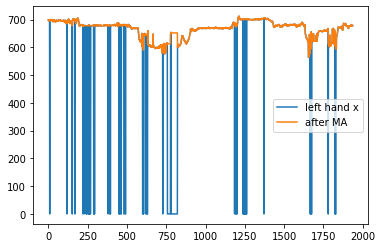

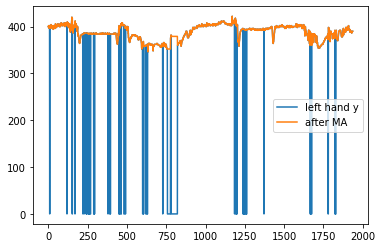

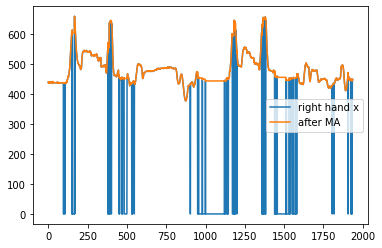

In [ ]:
# 左手のx座標
fig_lx = plt.figure() # Figureを作成
ax_lx = fig_lx.add_subplot(1,1,1) # Axesを作成
line1, = ax_lx.plot(df['flame'], df['pos_handL_x'], label='Raw Data') # Axes.linesにLine2Dを追加+その他の設定
line2, = ax_lx.plot(df2['flame'], df2['pos_handL_x'], label='After MA') # Axes.linesにLine2Dを追加+その他の設定
ax_lx.legend()
ax_lx.set_title('X Coordinates of Left Hand')

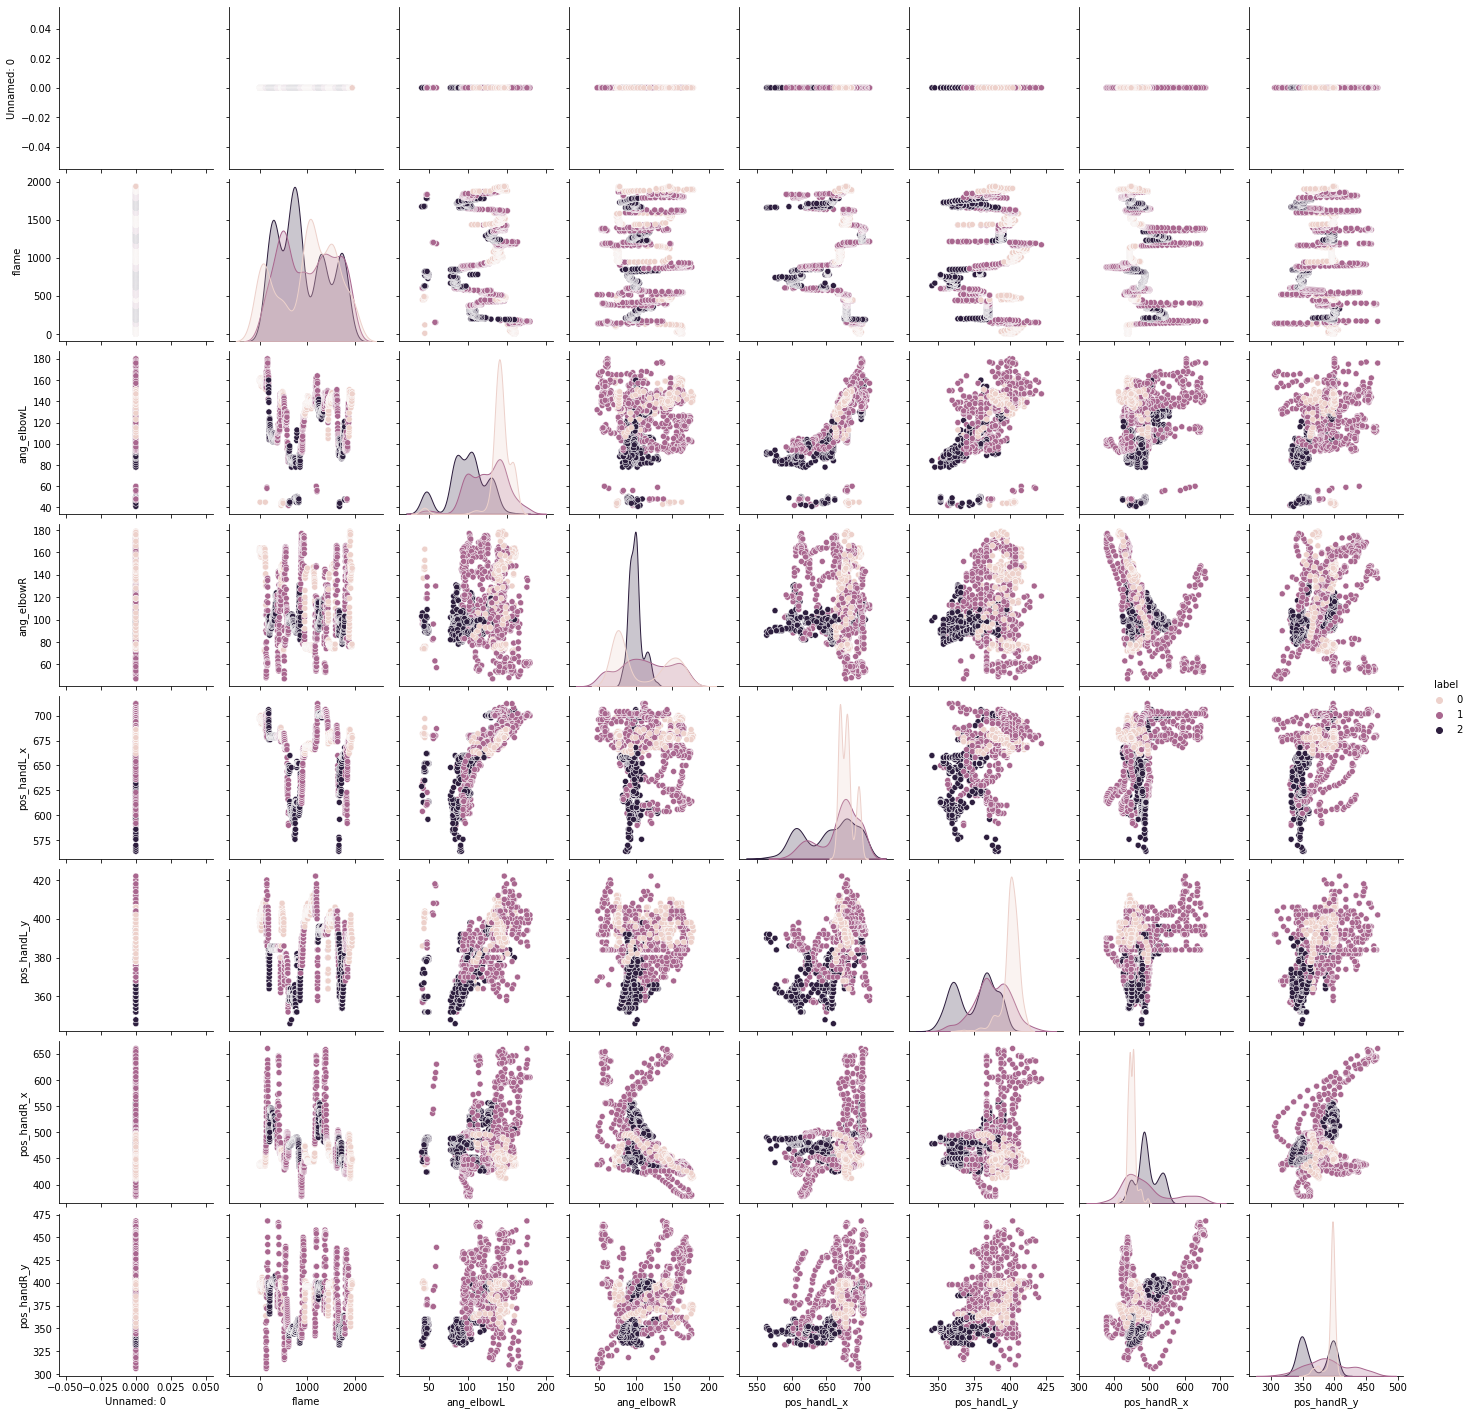

In [ ]:
# 色分けしてplotしてみる
sns.pairplot(df2, hue='label')

学習データとテストデータの準備

In [ ]:
from sklearn.model_selection import train_test_split
X = df2.loc[:,df2.columns!='label']
y = df2['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(len(X_train), len(X_test))

1355 582


学習

In [ ]:
y_train

878     1
178     1
1864    1
654     2
1916    0
       ..
835     2
1216    1
1653    1
559     1
684     2
Name: label, Length: 1355, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
# model = LogisticRegression(penalty='none')
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

予測

In [ ]:
X_test.head()

,Unnamed: 0,flame,ang_elbowL,ang_elbowR,pos_handL_x,pos_handL_y,pos_handR_x,pos_handR_y
1010,0,1010,144,75,670,404,444,396
979,0,979,134,75,668,402,454,397
1845,0,1845,129,142,674,380,448,406
1796,0,1796,99,162,612,384,420,410
220,0,220,116,91,678,384,542,394


In [ ]:
model.predict(X_test)

array([0, 0, 1, 1, 2, 0, 0, 2, 1, 1, 0, 1, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0,
       0, 1, 2, 2, 1, 2, 1, 0, 2, 2, 0, 1, 0, 0, 0, 0, 2, 0, 0, 2, 1, 1,
       2, 1, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 1, 2, 2, 1, 0, 0, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 0, 2, 1, 0, 2, 0, 1, 1, 2, 2, 0, 2, 2, 0, 0, 0, 2,
       1, 0, 0, 0, 2, 2, 1, 0, 1, 2, 0, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2,
       0, 1, 2, 2, 2, 0, 2, 0, 0, 2, 1, 0, 1, 2, 0, 1, 0, 2, 2, 2, 0, 1,
       2, 2, 2, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 1, 1, 0, 1, 0,
       2, 0, 0, 1, 0, 0, 0, 2, 0, 2, 1, 0, 2, 1, 1, 2, 2, 2, 1, 2, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 1, 0, 0, 2, 2, 1, 0, 2,
       0, 0, 2, 2, 2, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0,
       1, 2, 2, 0, 0, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 2, 2, 1, 2, 1,
       2, 2, 1, 2, 1, 0, 0, 2, 2, 0, 0, 1, 1, 1, 2, 2, 0, 2, 2, 0, 0, 2,
       0, 2, 1, 0, 1, 2, 0, 0, 0, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1,
       2, 2, 1, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2,

In [ ]:
# それぞれのラベルの確率を知りたいとき
model.predict_proba(X_test)

array([[0.96896733, 0.02983841, 0.00119426],
       [0.90070802, 0.09187264, 0.00741934],
       [0.23930769, 0.65940868, 0.10128363],
       ...,
       [0.00189809, 0.50037835, 0.49772356],
       [0.01957157, 0.46151346, 0.51891497],
       [0.85043835, 0.14544143, 0.00412022]])

In [ ]:
model.classes_

array([0, 1, 2])

混同行列 confusion matrix

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[159,  19,   8],
       [ 20, 119,  49],
       [  1,  28, 179]])

可視化

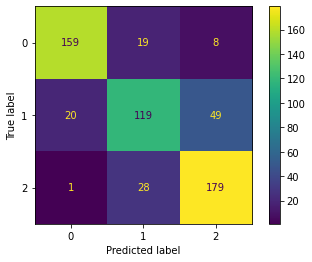

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [ ]:
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# accuracy
accuracy_score(y_test, y_pred)

0.7852233676975945

In [ ]:
from sklearn.metrics import precision_score
# None
print(precision_score(y_test, y_pred, average=None))
# macro
print(precision_score(y_test, y_pred, average='macro'))
# micro
print(precision_score(y_test, y_pred, average='micro'))

[0.88333333 0.71686747 0.75847458]
0.7862251264946792
0.7852233676975945


In [ ]:
# sorted(y_test)
# sorted(y_test.replace(["stand", "reach", "grasp"], [0, 1, 2]))

#y_list = np.where(y_pred, 'success', 'fail').tolist()
# l_y_pred.replace(["stand", "reach", "grasp"], [0, 1, 2])

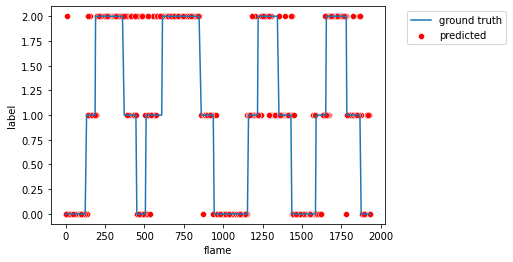

In [ ]:
# 散布図の作成
sns.lineplot(x="flame", y=y_test, data=X_test, label="ground truth")
sns.scatterplot(x="flame", y=y_pred, data=X_test, color="red", label="predicted")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')